# Final Assignment: Sustainable Development Goals
## EPA1333: Computer Engineering for Scientific Computing (2018/19, Q1)


* **Ioannis Papadogeorgos: 4737296**
* ** Manolis Papadakis:  4739418 **

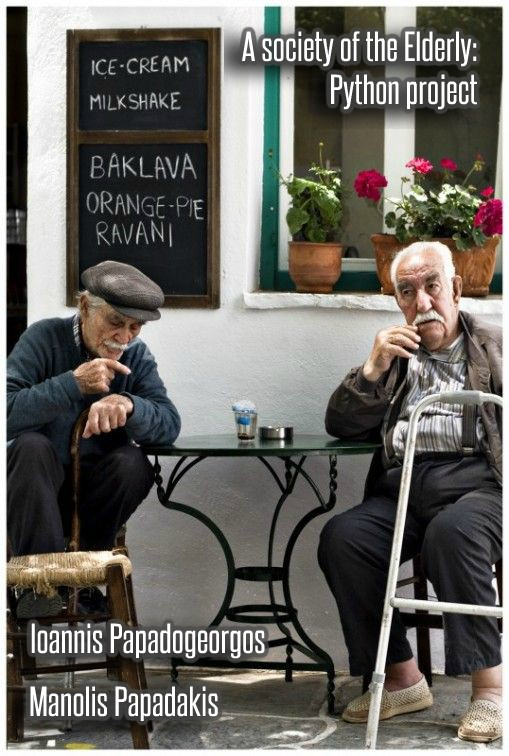

In [1]:
from IPython.core.display import Image
Image('http://i67.tinypic.com/ftzw35.jpg')

<div class="alert alert-success">
<h1>Introduction</h1>

Sustainable Development Goals (SDGs) offer a unique opportunity to balance between economic growth, social cohesion and justice, as well as protection of assets of unique ecological wealth. Within this context, Greece has established a set of outome-oriented national priorities to be satisfied by 2030, adapting the 17 SDGs to national needs and circumstances. Addressing poverty and social exclusion, while providing universal access to quality heath care services and high quality education describe its primary anthropocentric goals. The prosperity of its citizens lies on the top of the agenda, which denotes the promotion of equal opportunites for decent work for all, while fostering an innovative and sustainable economic growth.

Despite this ambitious and transformative plan for reshaping the economy and society, Greece have been through a period of 
prolonged economic crisis which impeded the achievement of this framework. The recession forced a focus towards 
economic policies, which created a divergence rather than contributing to achieving sustainable development ([Hellenic 
Republic, 2018](https://sustainabledevelopment.un.org/memberstates/greece)). The prosperity and well-being of the citizens became a secondary priority, urging for a strategic approach 
to coordinate national efforts for achieving the SDGs.

According to an analysis submitted to the Greek Parliamnet in September 2018, Greece has suffered a huge drop in its number of live births due to austerity and unemployment ([Guardian, 2013](https://www.theguardian.com/world/2013/sep/18/greece-birthrate-austerity-measures-healthcare)). The problem of low fertility among the Greek population has grown continuously over the last two decades and worsened significantly. The demographic changes have not only altered the age structure of population, but also generated a wide range of new developments, as well as changes at both societal and familial
levels ([Sarikaki, 2001](https://www.demogr.mpg.de/Papers/workshops/010623_paper24.pdf)).

>Consequently, the team will investigate ***which factors are more likely to affect the population trend in Greece by 2030***. A possible correlation will be questioned between the Birth deficit in Greece and the recorded Economic Growth, the Unemployment rate, and factors such as Health and Education. Particular strain will be put on the changes that the 2008 economic recession has brought, which disrupted the balances in Greek society for the following decade and forced the country to deviate from its sustainable goals for development. The analysis will conclude on those factors that the Greek government should emphasize more, in order to coordinate the national efforts for attaining the SDGs.

The analysis will begin with an overview of the data extracted from three sources, namely the World Bank, OECD and World Health Organisation. Proper visualisations will be provided for illustrating the historical trends and the existing situation, accompanied with a refection at the top of each subsection. A thorough Data analysis follows afterwards, delineating the trends which caused a population decrease in the last two decades. Interrelated indicators are clustered and possible correlations among them are investigated. The analysis will conclude on the most important factors which are more likely to affect the birth deficit the following decades, and provide recommendations on which sectors should be supported, in an effort to reverse the situation and attain the anthropocenntric sustainable goals of Greece.

In [1]:
# Import libraries 

import wbdata
import datetime
import warnings
from pylab import *

import seaborn as sns
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
from numpy.polynomial.polynomial import polyfit

% matplotlib inline
plt.style.use("ggplot")

In [3]:
#wbdata.get_source()               
#wbdata.get_indicator(source=19)   # Indicators related to SDGs: 19, 46

<div class="alert alert-success">
<h1>Data collection and Overview</h1>

The main consideration when collecting the data has been their availability for the time period close to the year 2008, where the financial crisis started. It is particularily essential to make comparisons between the periords before and after that year, which also underlines the impact of the global and national economic downturn on the Greek society. There are numerous interrelated dynamics which caused a demographic transition, hence the focus will be on the direct effects of the crisis to the living conditions due to the weakening in Employment and Health sectors, and the respective Government spendings. The Education level which played a catalytic role in the massive emigration of educated youths will also be discussed on top of other indicators. In this section, four factors will be discussed in total, accompanied with proper visualizations for grasping the full effect of the situation.

In [2]:
# The function helps to download a set of indicators from the World Bank databases for the desired start and end dates, 
# stored in a dictionary and given in a tuple of datetime objects for a specific country (default: all countries).

def read_from_wbdata(indicators, data_date=None, country=u'all'):
    
    pointers = wbdata.get_dataframe(indicators, convert_date=True, data_date=data_date)
    if country != u'all':
        pointers = pointers.xs(country)
        pointers.index = pointers.index.year
    return pointers

<div class="alert alert-success">
<h2>Demographic factor</h2>

The combination of birth decrease and youth emigration denotes that Greece is incrementally becoming a society of the elderly (~20% of 'Population ages 65 and above'). The ageing of the Greek population is maginfied due to both the fewer births and the fertility decline (bottom-up), and increasing longevity (top-down) ([Kokkinidis, 2017](https://greece.greekreporter.com/2017/08/13/the-dwindling-greeks-alarming-study-on-population-in-2050/)). On top of that, the International migrant stock have always been high in Greece in relation to its total population (~10%) which is consisted of a largely uninsured population. As shown in Figure 2, the death rate has surpassed the birth rate in Greece long before the crisis, and it was maginified after the massive emigration of youths and families around 2010. This resulted the massive age gap as shown in Figure 3, where the youth and elderly populations differ unproportionately.

In the past, the crude growth rate of the  Greek  population was entirely due to an increase in net migration ([Sarikaki, 2001](https://www.demogr.mpg.de/Papers/workshops/010623_paper24.pdf)). Without  migration  the population  of  the  country  would  be  in  decline  ([Eurostat, 2013](https://ec.europa.eu/eurostat/documents/3930297/5968986/KS-FP-13-001-EN.PDF/6952d836-7125-4ff5-a153-6ab1778bd4da)). This was mostly verified based on reports, given that data specific to migration and health insurance in Greece could not be retrieved. According to WHO, "most providers and insurers do not routinely collect data by legal status or on the national origin of the cases registered" ([Migration Data Portal, 2018](https://migrationdataportal.org/themes/migration-and-health)). Therefore, the native population is shrinking, while the international migrant stock is oriented to a short-term stay in the country.

In [3]:
# World Bank indicators
indicators = {"SP.POP.GROW": "Population growth (annual %)",\
              "SP.POP.TOTL": "Population, total",\
              "SP.POP.65UP.TO.ZS": "Population ages 65 and above (% of total)",\
              #"SP.POP.65UP.TO": "Population ages 65 and above, total",\
              "SP.POP.1564.TO.ZS": "Population ages 15-64 (% of total)",\
              #"SP.POP.1564.TO": "Population ages 15-64, total",\
              "SP.POP.0014.TO.ZS": "Population ages 0-14 (% of total)",\
              #"SP.POP.0014.TO": "Population ages 0-14, total",\
              "SP.DYN.LE00.IN":"Life expectancy at birth, total (years)",\
              "SP.DYN.CBRT.IN": "Birth rate, crude (per 1,000 people)",\
              "SP.DYN.CDRT.IN": "Death rate, crude (per 1,000 people)",\
              "SP.DYN.TFRT.IN": "Fertility rate, total (births per woman)",\
              "SH.STA.MMRT": "Maternal mortality ratio (per 100,000 live births)",\
              "SP.DYN.IMRT.IN": "Mortality rate, infant (per 1,000 live births)",\
              "SM.POP.TOTL.ZS": "International migrant stock (% of population)",\
              "SM.POP.NETM": "Net migration" }            
                 
data_date = (datetime.datetime(1980, 1, 1), datetime.datetime(2017, 1, 1))  # focus on the time period 1980 to 2017        
popul_ind_GR = read_from_wbdata(indicators, data_date, "Greece")            # for the case of Greece

In [4]:
# Interpolate to fill the NaN values. 

# All columns will be filled with the 'linear' method, except for Net Migration and International Migrant stock. 
# These demographics were renewed every 5 years, hence 'Quadradic' is used for these two for getting a smoother connection.

# isolate the two columns
net_migr = popul_ind_GR['Net migration']
intern_migr_stock = popul_ind_GR['International migrant stock (% of population)']

# apply quadradic interpolation to these two, and linear to the rest
popul_ind_GR = popul_ind_GR.drop('Net migration', axis=1).drop('International migrant stock (% of population)', axis=1)
popul_ind_GR = popul_ind_GR.interpolate(method='linear')  #quadratic for net migration and International stock
net_migr = net_migr.interpolate(method='quadratic')
intern_migr_stock = intern_migr_stock.interpolate(method='quadratic')

# merge all the above into one dataframe, and fill the NaN values at the start and end with the value of the nearest years
popul_ind_GR = pd.concat([popul_ind_GR, net_migr, intern_migr_stock], axis=1)
popul_ind_GR.fillna(axis=0, method='bfill', inplace=True)       
popul_ind_GR.fillna(axis=0, method='ffill', inplace=True)

#popul_ind_GR.head(10)

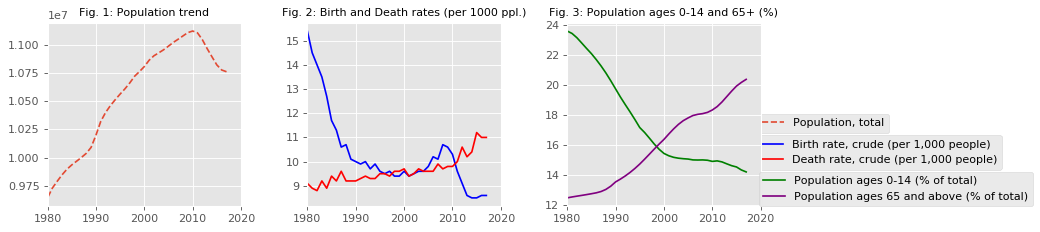

In [5]:
# Overview of the demographic data

fig = plt.figure(figsize=(10, 3), dpi=80)

# Plot the Population trend
plt.subplot(1, 3, 1)
plt.plot(popul_ind_GR.index, popul_ind_GR['Population, total'], linestyle='dashed') 
plt.title('Fig. 1: Population trend', fontsize=10)
plt.xlim(1980, 2020); plt.legend(loc=[3.67, 0.4])

# Plot the Birth and Death rates
plt.subplot(1, 3, 2)
plt.plot(popul_ind_GR.index, popul_ind_GR['Birth rate, crude (per 1,000 people)'], color='blue')
plt.plot(popul_ind_GR.index, popul_ind_GR['Death rate, crude (per 1,000 people)'], color='red')
plt.title('Fig. 2: Birth and Death rates (per 1000 ppl.)', fontsize=10)
plt.xlim(1980, 2020); plt.legend(loc=[2.32, 0.2])

# Plot the two Population Age Groups
plt.subplot(1, 3, 3)
plt.plot(popul_ind_GR.index, popul_ind_GR['Population ages 0-14 (% of total)'],  color='green')
plt.plot(popul_ind_GR.index, popul_ind_GR['Population ages 65 and above (% of total)'], color='purple')
plt.title('Fig. 3: Population ages 0-14 and 65+ (%)', fontsize=10)
plt.xlim(1980, 2020); plt.legend(loc=[0.99, 0])

plt.tight_layout()    # make the layout of the subplots, so they do not overlap

<div class="alert alert-success">
<h2>Economic factor</h2>
 
The cost of life has significantly increased the last decade, and Greek households became gradually incapable of covering their expenses through their curtailed annual income. The higher sale prices compared to the previous decades indicate a decrease in consumer purchases and a rise in inflation ([Investopedia, 2018](https://www.investopedia.com/ask/answers/012115/consumer-price-index-cpi-best-measure-inflation.asp#ixzz5V262nCbm)), eventually leading to adjustments in income and living costs. Subsequently, the household savings have plummeted after the start of the recession, indicating their incapacity to carry the cost of raising newborns.

>The gross national income (GNI) is the total domestic and foreign output claimed by residents of a country ([Shafrin, 2011](https://www.healthcare-economist.com/2011/03/23/what-is-the-difference-between-gdp-gnp-and-national-income/)). The Net national income (depicted as a purple line in Figure 4) is equal to the GNI net of depreciation, and follows the trend of the GDP growth (bar graph in Figure 4). It is observed to be worryingly low in contrast with the cost of living during the last decade for the case study of Greece (red line in Figure 4). An example of the decreasing purchasing power of consumers is the Final consumption expenditure, which has been plundged from 220 bil.EUR to 169 bil.EUR during the years of the economic crisis. 

Cuts on Personal Income also result a decrease on the contributions to government social insurance programs, since they are financed directly by both the citizens (consumers and/or employers) and the Government expenditures. Social contributions, which feed the social protection systems for protecting people against the risks associated with unemployment, remain at levels of 30% of Gov. revenues, but this state corresponds to gradually dropped wages. On top of that, tax responsibilities, which have been steadily increased during the last decade as a percentage of the GDP, kneeled the middle-class households and made the saving up infeasible (i.e. negative 'Adjusted savings'). The decreased wages perpetuate the problem, leading to lower demand as consumers spend less freely (Figure 4). This entails that the production is being decreased, leading to higher unemployment rates ([Pettinger, 2017](https://www.economicshelp.org/blog/10142/unemployment/low-economic-growth-unemployment/)).

On the basis of the points mentioned above, it would seem that the economic factor is a crucial driver of the population decrease, since the financial burden is translated into incapacity to afford the living expenses of children.

In [6]:
# World Bank indicators
indicators = {#"NY.GDP.MKTP.CN": "GDP (current LCU)",\
              "NY.GDP.MKTP.KD.ZG": "GDP growth (annual %)",\
              "NY.GDP.MKTP.KN": "GDP (constant LCU)",\
              #"NY.GNP.PCAP.KD.ZG": "GNI per capita growth (annual %)",\
              "NY.ADJ.NNTY.KD.ZG": "Adjusted net national income (annual %)",\
              "NE.CON.TOTL.KN": "Final consumption expenditure (constant LCU)",\
              "NY.ADJ.NNAT.GN.ZS": "Adjusted savings: net national savings (% of GNI)",\
              "FP.CPI.TOTL.ZG": "Inflation, consumer prices (annual %)",\
              "GC.REV.SOCL.ZS": "Social contributions (% of revenue)",\
              "GC.TAX.TOTL.GD.ZS": "Tax revenue (% of GDP)"}            

data_date = (datetime.datetime(1980, 1, 1), datetime.datetime(2017, 1, 1))       # focus on the time period 1980 to 2017      
econ_ind_GR = read_from_wbdata(indicators, data_date, "Greece")                  # for the case of Greece

In [7]:
# interpolate to fill the NaN values. 
econ_ind_GR=econ_ind_GR.interpolate(method='linear')     
econ_ind_GR.fillna(axis=0, method='bfill', inplace=True)  # fill the remaining NaN with the values of the previous year
#econ_ind_GR.head(10) 

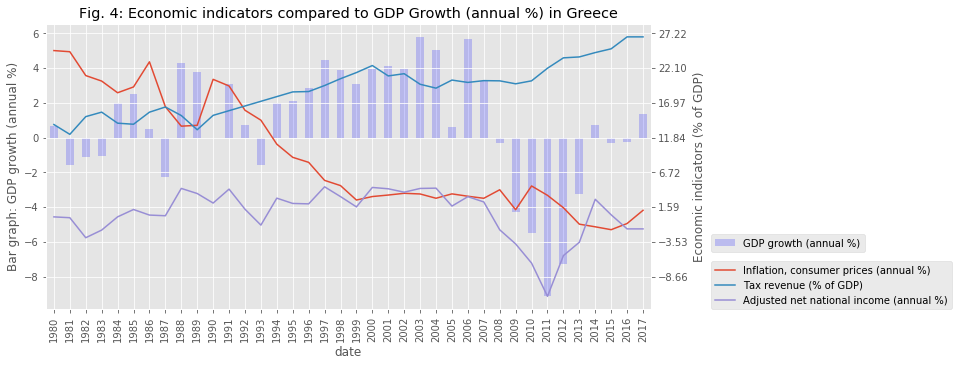

In [8]:
# Plot the observations together

econ_ind_GR.sort_index(inplace=True)  # reverse the Time order for graphic purposes (start from 1980)

fig = plt.figure(figsize=(10,5))

# Plot the GDP growth
ax=econ_ind_GR['GDP growth (annual %)'].plot(kind='bar', color='blue', alpha=0.2)
plt.ylabel('Bar graph: GDP growth (annual %)')
plt.xticks(rotation=90)

# Plot the Economic Indicators in the same figure
ax2 = ax.twinx()  # plot the lines on top of the bar graph
ax2.plot(ax.get_xticks(), econ_ind_GR['Inflation, consumer prices (annual %)'])
ax2.plot(ax.get_xticks(), econ_ind_GR['Tax revenue (% of GDP)'])
ax2.plot(ax.get_xticks(), econ_ind_GR['Adjusted net national income (annual %)'])
plt.ylabel('Economic indicators (% of GDP)')

# fix the gridlines of the multiple plots
ylim1 = ax.get_ylim()
yticks1 = ax.get_yticks()
dist = [(i-ylim1[0])/(ylim1[1]-ylim1[0]) for i in yticks1] # find the distances between the ticks 
                                                             # and the actual values of the left-hand yy' axis
ylim2 = ax2.get_ylim()
yticks2 = [j*(ylim2[1]-ylim2[0])+ylim2[0] for j in dist]   # find the new ticks for the right-hand yy' axis

ax2.set_yticks(yticks2)       # set the new ticks in the right-hand yy' axis
ax2.set_ylim(ylim2)           # !! re-adjust the limits to the original values
ax.yaxis.grid(which="major")  # keep the gridlines of the 1st plot, and match the gridlines of the 2nd plot to the 1st
ax2.yaxis.grid(which="minor")

# Show the graph
fig.tight_layout()
ax.legend(loc=(1.1, 0.2))
ax2.legend(loc=(1.1, 0))
plt.title('Fig. 4: Economic indicators compared to GDP Growth (annual %) in Greece')
plt.show()

econ_ind_GR.sort_index(ascending=False, inplace=True) # return the dataframe to the previous state

<div class="alert alert-success">
<h2>Employment factor</h2>

On closer inspection at the labour market, the country is plagued by very high rates of unemployment. As seen in Figure 5, the most vulnerable age group after the crisis is the youths (ages 15-24), followed by people of intermediate education (across all ages). Both of the groups are reaching an overwhelming percentage of 43% and 27% of unemployment on average, respectively. A substantial increase in unemployment rates is also noted among the populations of advanced education, which peaked at 24,5% in the years aftermath the economic collapse. Therefore, people of intermediate and advanced education are forced to emigrate due to unemployment and low wages, pursuing a more fair compensation for their efforts abroad.

Greek market is slowly being stagnated, as a result of the low growth during the 2008 recession. The labor force started to age (Age dependency ratio, young 20%), while the economy shifted towards a less dynamic orientation. More people are employed in services than the industry (72.5% and 15.2%, respectively), where the employment growth is decreasing. This structural change, in combination with consistent pay cuts during the last decade, leads to a decrease of productivity and hence a drop in economic growth ([Storm, 2017](https://www.ineteconomics.org/perspectives/blog/the-new-normal)).

This reformation of the job scene is also underlined by the drop of contributing family workers (from 11% in 1998 to 3.6% in 2017); this is the group of people who hold self employment jobs in a market-oriented establishment operated by a related person living in the same household ([OECD, 2003](https://stats.oecd.org/glossary/detail.asp?ID=443)). It can also be translated as a birth rate fall when families cannot afford the living costs of numerous family members, or the tendency of whole families to emigrate for pursuing better living conditions. 

In [9]:
# World Bank indicators

indicators = {"SL.TLF.TOTL.IN": "Labor force, total", \
              "SL.SRV.EMPL.ZS": "Employment in services (% of total employment)",\
              "SL.IND.EMPL.ZS": "Employment in industry (% of total employment)", \
              "SP.POP.DPND.YG": "Age dependency ratio, young (% of working-age population)",\
              "SL.FAM.WORK.ZS": "Contributing family workers, total (% of total employment)",\
              "SL.UEM.TOTL.ZS": "Unemployment, total (% of total labor force)", \
              "SL.UEM.INTM.ZS": "Unemployment with intermediate education (% of total labor force)",\
              "SL.UEM.ADVN.ZS": "Unemployment with advanced education (% of total labor force)",\
              "SL.UEM.1524.ZS": "Unemployment, youth total (% of total labor force)"}

data_date = (datetime.datetime(1990, 1, 1), datetime.datetime(2017, 1, 1))    # focus on the time period 1990 to 2017          
jobs_ind_GR = read_from_wbdata(indicators, data_date, "Greece")               # for the case of Greece

unemployment_GR = jobs_ind_GR.loc[:'1998']   # isolate the period 1998-2017.

#jobs_ind_GR.head(10)

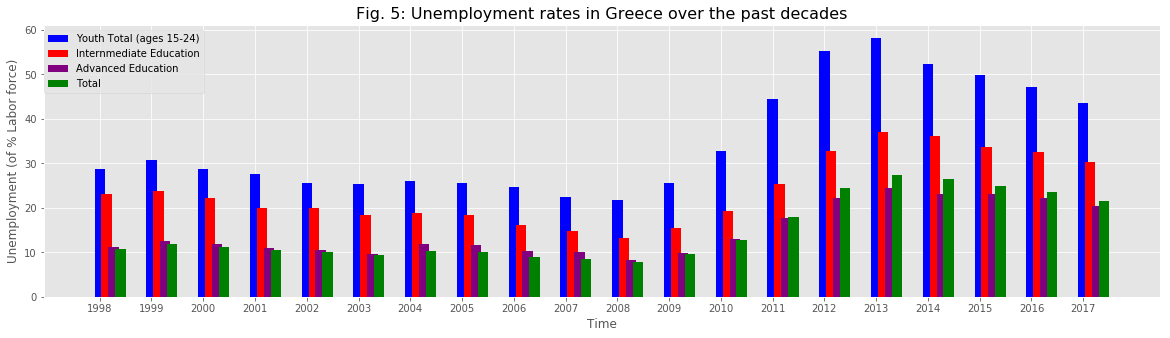

In [10]:
unemployment_GR = unemployment_GR.sort_index()  # reverse the Time order for graphic purposes

fig = plt.figure()
fig,ax = plt.subplots(figsize=(20, 5))
width = 0.2

# Plot the Unemployment rates in one figure
p1 = ax.bar(np.arange(1998, 2018), unemployment_GR['Unemployment, youth total (% of total labor force)'], width, color='blue', align='center')
p2 = ax.bar(np.arange(1998, 2018)+width/1.5, unemployment_GR['Unemployment with intermediate education (% of total labor force)'], width, color='red', align='center')
p3 = ax.bar(np.arange(1998, 2018)+2*width/1.5, unemployment_GR['Unemployment with advanced education (% of total labor force)'], width,  align='center', color='purple')
p4 = ax.bar(np.arange(1998, 2018)+3*width/1.5, unemployment_GR['Unemployment, total (% of total labor force)'], width, align='center', color='green')

# create a legend for multiple graphs
ax.legend([p1, p2, p3, p4], ["Youth Total (ages 15-24)", "Internmediate Education", "Advanced Education", "Total"], loc=(0,.75))

plt.xticks(unemployment_GR.index) 
plt.xlabel('Time'); plt.ylabel('Unemployment (of % Labor force)')
plt.title('Fig. 5: Unemployment rates in Greece over the past decades', fontsize=16)
plt.show()

<div class="alert alert-success">
<h2>Government factor </h2>

Childbirth in Greece is profoundedly affected by budget-reducing policies. Immersed in years of recession and experiencing the longest on record for an advanced western economy, Greece is in the midst of a public health disaster that according to doctors is worsening by the day ([Guardian, 2013](https://www.theguardian.com/world/2013/sep/18/greece-birthrate-austerity-measures-healthcare)). The country's health budget has been slashed by close to 40%, while State 
funds for medication have been axed by almost half, from €5bn euro to just over €2bn, since the turmoil began.

   >"Health spending" measures the final consumption of health care goods and services (i.e. current health expenditure) including personal health care (curative care, rehabilitative care, long-term care, ancillary services and medical goods) and collective services (prevention and public health services as well as health administration), but excluding spending on investments.
    
Out-of-pocket spending on health services is the most common form of health financing in developing countries and represents  a significant financial burden for households ([WHO, 2004](http://apps.who.int/iris/bitstream/handle/10665/69032/EIP_FER_DP_04.3.pdf?sequence=1&ua=1)). By observing the data below, households may pay less 'out-of-pocket' expenditures (OOP) compared to the previous years, but at the same time, current health expenditures per capita have dropped by half during the last decade. This leads to the conclusion that households curtail their expenses against their health, since their capacity to pay has been substantially decreased. In the absence of a decent form of financial protection, poor sections are forced to make OOP payments, forcing  households to give up their savings, resort to borrowings or sell assets to meet this expenditure ([Arthapedia, 2011](http://www.arthapedia.in/index.php?title=Out_of_pocket_expenditure)).

The high costs of healthcare and the decline of health insurance coverage are especially acute for Greece's large migrant community, who have significantly low rates of health insurance coverage and poor access to health care services. Nearly 50% of them are uninsured, facing hindrances to medical service and obligations for more OOP expenditures for receiving care. Growing numbers of uninsured migrant mothers are failing to register children at birth for fear of being forced to pay delivery rates that few can afford. According to estimates by the Ministry of Health, approx. 2.5 million uninsured people (one in four) did not have access to publicly provided healthcare in 2016. The high estimates are verified by the policy of the National Organisation for Healthcare (EOPYY), which is only effectively covering the unemployed for a maximum of two years, thus leading to a rise in the percentage of the uninsured population (Economou et al, 2017).

<div class="alert alert-success">
The following data were collected from three sources: *OECD, World Bank, and World Health Organisation*. The resulting dataframes **"gov_exp"**, **"wb_ind_GR"** and **"who_ind_GR"** will be merged into one, called **"gov_int_GR"**.

In [11]:
# OECD indicators on General Government Spendings

# import OECD_indicators
gov_exp_health = pd.read_csv(r'OECD_indicators/GR_Health.csv', sep=',', header=0, index_col=5)
gov_exp_edu = pd.read_csv(r'OECD_indicators/GR_Education.csv', sep=',', header=0, index_col=5)
gov_exp_econ = pd.read_csv(r'OECD_indicators/GR_Economic Affairs.csv', sep=',', header=0, index_col=5)
gov_exp_pbl = pd.read_csv(r'OECD_indicators/GR_General Public Services.csv', sep=',', header=0, index_col=5)
gov_exp_rnd = pd.read_csv(r'OECD_indicators/GR_R&D.csv', sep=',', header=0, index_col=5)
gov_exp_tot = pd.read_csv(r'OECD_indicators/OECD_Gov_Expenditures.csv', sep=',', header=0, index_col=5)

# remove unecessary columns ...
gov_exp_health = gov_exp_health.drop('Flag Codes', axis=1).drop('MEASURE', axis=1).drop('INDICATOR', axis=1).drop('FREQUENCY', axis=1).drop('SUBJECT', axis=1).rename(columns={'Value':'Gov. Expend. on Health (% of GDP)'})
gov_exp_edu = gov_exp_edu.drop('Flag Codes', axis=1).drop('MEASURE', axis=1).drop('INDICATOR', axis=1).drop('FREQUENCY', axis=1).drop('SUBJECT', axis=1).rename(columns={'Value':'Gov. Expend. on Education (% of GDP)'})
gov_exp_econ = gov_exp_econ.drop('Flag Codes', axis=1).drop('MEASURE', axis=1).drop('INDICATOR', axis=1).drop('FREQUENCY', axis=1).drop('SUBJECT', axis=1).rename(columns={'Value':'Gov. Expend. on Economic Affairs (% of GDP)'})
gov_exp_pbl = gov_exp_pbl.drop('Flag Codes', axis=1).drop('MEASURE', axis=1).drop('INDICATOR', axis=1).drop('FREQUENCY', axis=1).drop('SUBJECT', axis=1).rename(columns={'Value':'Gov. Expend. on Public Services (% of GDP)'})
gov_exp_rnd = gov_exp_rnd.drop('Flag Codes', axis=1).drop('MEASURE', axis=1).drop('INDICATOR', axis=1).drop('FREQUENCY', axis=1).drop('SUBJECT', axis=1).rename(columns={'Value':'Gov. Expend. on R&D (% of GDP)'})
gov_exp_tot = gov_exp_tot[(gov_exp_tot.SUBJECT=='TOT')&(gov_exp_tot.MEASURE=='PC_GDP')].drop('Flag Codes', axis=1).drop('MEASURE', axis=1).drop('INDICATOR', axis=1).drop('FREQUENCY', axis=1).drop('SUBJECT', axis=1).rename(columns={'Value':'Total Gov. Expend. (% of GDP)'})


# and keep rows only related to Greece 
gov_exp_health_GR = gov_exp_health[gov_exp_health.LOCATION=='GRC']
gov_exp_edu_GR = gov_exp_edu[gov_exp_edu.LOCATION=='GRC']
gov_exp_econ_GR = gov_exp_econ[gov_exp_econ.LOCATION=='GRC']
gov_exp_pbl_GR = gov_exp_pbl[gov_exp_pbl.LOCATION=='GRC']
gov_exp_rnd_GR = gov_exp_rnd[gov_exp_rnd.LOCATION=='GRC']
gov_exp_tot_GR = gov_exp_tot[gov_exp_tot.LOCATION=='GRC']

# merge the above dataframes into one and drop the LOCATION columns since we are specifically reffering to Greece all the time  
gov_exp = pd.concat([gov_exp_tot_GR.drop(columns="LOCATION"), gov_exp_econ_GR.drop(columns="LOCATION"),\
                     gov_exp_health_GR.drop(columns="LOCATION"), gov_exp_edu_GR.drop(columns="LOCATION"),\
                     gov_exp_pbl_GR.drop(columns="LOCATION"), gov_exp_rnd_GR.drop(columns="LOCATION")], axis=1).sort_index(ascending=False)

# interpolate linearly to fill the NaN values
gov_exp['Gov. Expend. on R&D (% of GDP)'] = gov_exp['Gov. Expend. on R&D (% of GDP)'].interpolate(method='linear')

#gov_exp.head(10) # The dataframe refers explicitly to government expenditures, hence the name "gov_exp" was selected.

In [12]:
# World Bank (WB) indicators 

indicators = {"SH.XPD.PVTD.PC.CD": "Domestic private health expenditure per capita (current US$)",\
              "SH.XPD.OOPC.PC.CD": "Out-of-pocket expenditure per capita (current US$)"}
              #"SH.XPD.KHEX.GD.ZS": "Capital health expenditure (% of GDP)",\  # no data after 2008
              #"SH.XPD.CHEX.GD.ZS": "Current health expenditure (% of GDP)"

data_date = (datetime.datetime(1990, 1, 1), datetime.datetime(2017, 1, 1))  # focus on the time period 1990 to 2017         
wb_ind_GR = read_from_wbdata(indicators, data_date, "Greece")               # for the case of Greece

# fill the NaN values at the beginning with the value of the nearest year
wb_ind_GR.fillna(axis=0, method='bfill', inplace=True)   

# turn the values as a percentage of GDP
wb_ind_GR['Out-of-pocket expenditure per capita (% of GDP)']=wb_ind_GR['Out-of-pocket expenditure per capita (current US$)']*\
                                                             popul_ind_GR['Population, total']*100/econ_ind_GR['GDP (constant LCU)']
        
wb_ind_GR['Domestic private health expenditure per capita (% of GDP)']=wb_ind_GR['Domestic private health expenditure per capita (current US$)']*\
                                                                       popul_ind_GR['Population, total']*100/econ_ind_GR['GDP (constant LCU)']

# drop the old ones
wb_ind_GR=wb_ind_GR.drop('Out-of-pocket expenditure per capita (current US$)', axis=1).drop('Domestic private health expenditure per capita (current US$)', axis=1)

In [13]:
# World Health Organisation (WHO) indicators 

#Import WHO_indicators, and bring it to the same form as the previous dataframes
who_ind_GR = pd.read_csv('WHO_indicators.csv', header=0, delimiter=';', sep=';')
who_ind_GR = who_ind_GR.drop('Unnamed: 2', axis=1).drop('Countries', axis=1)
who_ind_GR = who_ind_GR.T

# fix the columns names
who_ind_GR.columns = [who_ind_GR.loc['Indicators'].values] 
col = [who_ind_GR.columns[i][0] for i in range(len(who_ind_GR.columns))] # get rid of the tuple from the MultiIndex dataframe
who_ind_GR.columns=col

# Keep the useful columns, and drop these which overlap with those from wb_ind_GR
who_ind_GR.drop('Indicators', axis=0, inplace=True)
who_ind_GR.sort_index(ascending=False, inplace=True)

who_ind_GR = who_ind_GR.drop('Current Health Expenditure per Capita (% of GDP)', axis=1).\
            drop('Domestic General Government Health Expenditure (% of General Government expenditure)', axis=1).\
            drop('Gross domestic product - Price index (%)', axis=1)

who_ind_GR.index = who_ind_GR.index.astype(int) 

In [14]:
# Merge the indicators of the WB and WHO databases (various indicators)
gov_GR = pd.concat([wb_ind_GR, who_ind_GR], axis=1).sort_index(ascending=False).fillna(axis=0, method='bfill')

<div class="alert alert-success">

To wrap up the "Government Factor" section, the **gov_exp** includes the government expenditures (% of GDP) in every sector of interest, and the **gov_GR** elaborates on Health indicators concerning the government health expenditures. The combination of these two is the **gov_ind_GR**. The remaining NaN values are too many to be filled with the previous methods, but they will not affect the process in the following section.

In [15]:
# Merge the "gov_exp" and "gov_GR", and fill the missing values
gov_ind_GR = pd.concat([gov_exp,gov_GR], axis=1)
gov_ind_GR = gov_ind_GR.sort_index(ascending=False).fillna(axis=0, method='bfill')

gov_ind_GR.dropna(axis=0, how='all', inplace=True) # remove rows containing only NaN values
gov_ind_GR = gov_ind_GR.loc[:2000]                   # keep the rows after 2000
#gov_ind_GR.head(10)

<div class="alert alert-success">

In Figure 6, the current health expenditures in the xx' axis (i.e. final consumption of health care goods and services) are compared against the investment in Health care. Health care is financed through a mix of financing arrangements including government spending and compulsory health insurance ("Government/compulsory" - yy' axis) as well as voluntary health insurance and private funds such as households’ OPPs ([OECD, 2017](https://data.oecd.org/healthres/health-spending.htm)). It is shown that substantial investment lag behind, while the governmental expneditures are disproportional to the unemployent rates, denoted as larger dots for bigger rates. The most heavily concentrated datapoints will show darker (alpha=0.7).

According to Figure 6, less financing in the Health sector is taking place when unemployment rates are thriving, perpetuating the problem since people are incapable of making contributions to the healthcare system. This is particularily important for the case of Infant and Maternal mortality, since unemployed individuals have lower coverage compared to their employed counterparts. All the above are shown against the net average income (darker color for higher income), revealing that in times of low Health Expenditures, household revenues are also dropped which hinders the access to healthcare. Figure 7 verifies that the incremental drop of Government Expenditure on Health is substantial (from 6.4% of GDP in 2008 to 4.9% in 2017), showing the decrease of Government resources which used to fund health expenditures as a share of the economy. Therefore, when less expenditures are devoted to healthcare, this results a direct effect to the birth deficit.

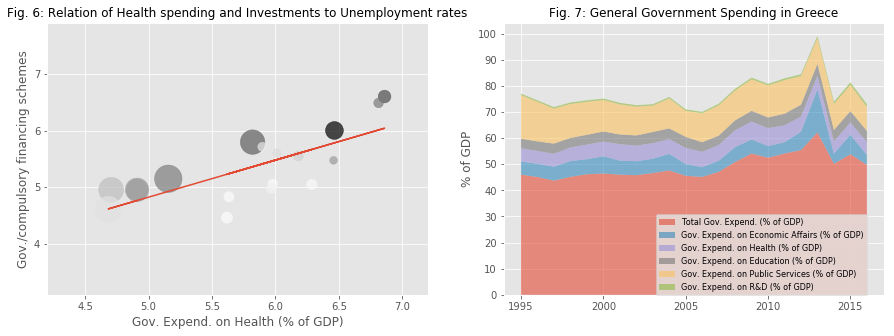

In [17]:
# Plot the observations

# store the columns in new variables
x=gov_ind_GR['Gov. Expend. on Health (% of GDP)']
y=gov_ind_GR['Gov. and Compulsory contrib. healthcare financing schemes (% of GDP)']
z=jobs_ind_GR['Unemployment, total (% of total labor force)']

# normalize the values National income. It will be used as a color scale in Figure 6.
col=econ_ind_GR['Adjusted net national income (annual %)']
normalized = (col-min(col))/(max(col)-min(col))
colors=normalized.values
colors=[str(item) for item in colors] # The coloring scale between 0-1 corresponds to shades of gray


fig=plt.figure(figsize=(15,5))
# Figure 6: Scatter plot
fig.add_subplot(121)
plt.scatter(x, y, s=z**2, alpha=0.7, c=colors)  
plt.xlabel('Gov. Expend. on Health (% of GDP)'); plt.ylabel('Gov./compulsory financing schemes')
plt.xlim(4.2,7.2); plt.ylim(3.1,7.9)
plt.title('Fig. 6: Relation of Health spending and Investments to Unemployment rates', fontsize=12)

# fit a line with polyfit
polyfit = np.polyfit(x.values,y,1)
values = np.polyval(polyfit, x.values)
plt.plot(x.values, values)
          
# Figure 7: Government spendings in Greece
fig.add_subplot(122)
plt.stackplot(gov_exp.index, [gov_exp.iloc[:,0], gov_exp.iloc[:,1], gov_exp.iloc[:,2],
                gov_exp.iloc[:,3], gov_exp.iloc[:,4], gov_exp.iloc[:,5]], alpha=0.6)

plt.title('Fig. 7: General Government Spending in Greece',  fontsize=12)
plt.yticks(np.arange(0,101,10))
plt.ylabel('% of GDP')
plt.legend(gov_exp.columns,loc=(0.4,0), fontsize=8)
plt.title('Fig. 7: General Government Spending in Greece',  fontsize=12)

warnings.filterwarnings("ignore")
plt.show()

<div class="alert alert-success">
<h1>Data Analysis</h1>


After having the data visualized to get the effect of the situation, a thorough look at the interrelated indicators will highlight the undelying dynamics in the Greek society. By looking at the indicator trends, making comparisons among them, and assessing the correlations behind them for the periods before and after the crisis, it can be shown which factors are more likely to influence the outome-oriented national priorities for achieving the SDGs.

>The *Correlation* is a statistic that assesses the degree to which two variables move together or in opposites directions. A correlation coefficient of 1 (-1) indicates a perfect positive (negative) correlation between two stocks, meaning that the stocks have historically always moved in the same (opposite) direction by the same amount. There is no correlation, if a variable is weakly related to others (close to 0).

In this case, this statistic will be used for backing up the assumptions made about the interrelated trends of the indicators, and potentially reveal some interesting or underlying connections between others. Clustering of indicators is made automatically in Figure 17. The most important conclusions will be mentioned as follows.

By applying the polyfit function to the Total Population values (Figure 8), it is projected that the population in Greece will be 9.7 million people by 2030. It is aligned with the estimations that the Greek population would decrease by 10% the following decades ([Kokkinidis, 2017](https://greece.greekreporter.com/2017/08/13/the-dwindling-greeks-alarming-study-on-population-in-2050/)). The time period selected for the projection is the 1990-2017, since the declining birth rates between 1990-2008 is representative to the modern greek lifestyle and counterbalances the steep decrease of births after the crisis. The final estimation is calculated unattached from the aforementioned indicators. Subsequently, we will further investigate the strongest correlations between the birth deficit and the evolution of economic, employment and governmental indicators. 

In [18]:
popul_after = popul_ind_GR.loc[:2008]       # The decade after the beginning of the 2008 crisis
popul_before = popul_ind_GR.loc[2007:1998]  # The decade before the beginning of the 2008 crisis
popul_polyfit = popul_ind_GR.loc[:1990]     # The period which includes a declining birth rate from 1990 to 2008, and after

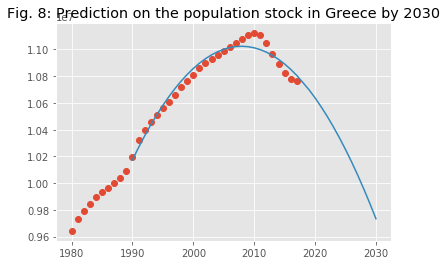

The population of Greece is predicted to be 9.73 millions by 2030


In [19]:
# fit a line to the population data and estimate the population in 2030.

polyfit = np.polyfit(popul_polyfit.index, popul_polyfit['Population, total'], deg=2)
years = np.append(np.arange(2019,2031)[::-1], popul_polyfit.index)  # add empty cells from 2019 to 2030
values = np.polyval(polyfit, years)

plt.plot(popul_ind_GR.index, popul_ind_GR['Population, total'],'o')
plt.plot(years,values)
plt.title('Fig. 8: Prediction on the population stock in Greece by 2030')
plt.show()

print("The population of Greece is predicted to be %0.2f millions by 2030" %(values[0]/1000000))

<div class="alert alert-success">
<h2>Indicator trends post 2008 crisis (2008-2017)</h2>

In this section, it will be shown how the trends of all indicators evolved, for the post-crisis period 2008-2017. For this purpose, all indicators (39 in Total) were combined into one dataframe, isolating the rows for the years after 2008. The result is firstly used for identifying the strongest correlations between the Total Population and the rest of the indicators (minus the Maternal mortality ratio which is relatively stable), and secondly for visualizing the trends of the indicators (Figures 9 and 10). The strong correlations will be used as a benchmark for investigating interesting combinations of indicators that explicate the situation, while the trends will show which parameters were undermined or secured during the crisis.

While the Total Population was dropping within the period 2008-2017, the group age of 0-14 was decreasing by almost the same amount. This correlation may not imply causality, but at a first glance this denotes an inability of the existing populations to procreate in the near future. The crude death rate and infant mortality rate are negatively correlated to the population, meaning that the stocks have historically moved in the opposite direction. 

The international migrant stock is feading the numbers of the population, since it consistently remained at the levels of 10% throughout the years, even before crisis. The trends in employment practices, the rising costs of health care insurance, and changes in eligibility for government programs have contributed to this phenomena ([Camarota et al., 2000](https://cis.org/Report/Without-Coverage)), where the growing numbers of uninsured migrant mothers are failing to register children at birth for fear of being forced to pay delivery rates that few can afford. 

Among the steepest, hence most worring, indicator trends after crisis are those of the infant mortality, population ages 65+, Adjusted savings, Employment in services, and private expenditures on healthcare.

In [20]:
# isolate the key indicators for the time period after the crisis
x1 = popul_ind_GR.loc[:2008]
x2 = econ_ind_GR.loc[:2008]
x3 = jobs_ind_GR.loc[:2008]
x4 = gov_ind_GR.loc[:2008]

#combine all indicators into one dataframe
EJGP_after = pd.concat([x1,x2,x3,x4], axis=1)
EJGP_after.drop('Maternal mortality ratio (per 100,000 live births)', axis=1, inplace=True)

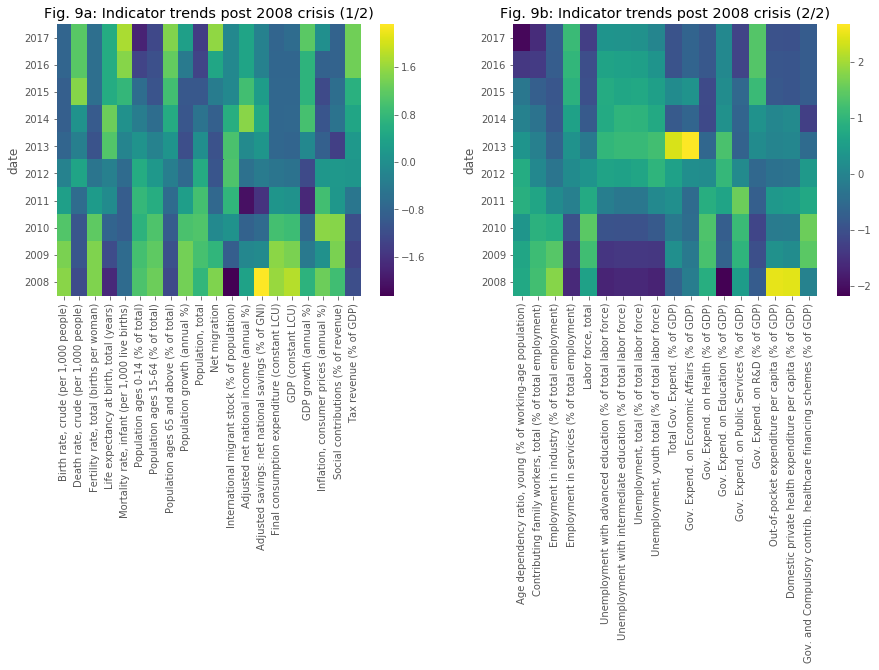

In [21]:
# Normalization by columns is necessary to find out patterns in the heatmap. 

EJGP_after_1 = EJGP_after.iloc[:2008, :20]
EJGP_after_2 = EJGP_after.iloc[:2008, 20:]

fig = plt.figure(figsize=(15,5))

# Figure 9a
plt.subplot(121)
df1 = EJGP_after_1
norm_EJPG = (df1-df1.mean())/df1.std()
sns.heatmap(norm_EJPG, cmap='viridis')
plt.yticks(rotation=0); plt.title('Fig. 9a: Indicator trends post 2008 crisis (1/2)')

# Figure 9b
plt.subplot(122)
df2 = EJGP_after_2
norm_EJPG=(df2-df2.mean())/df2.std()
sns.heatmap(norm_EJPG, cmap='viridis')
plt.yticks(rotation=0); plt.title('Fig. 9b: Indicator trends post 2008 crisis (2/2)')

plt.show()

<div class="alert alert-success">

<h2>Investigation of Strong Correlations among the Indicators</h2>

<h3> Population before and after crisis</h3>

Before the 2008 crisis (Figure 10), the total Greek population was very strongly positively correlated with the life expectancy, the population ages 65+, the international migrant stock and the population ages 15-64. Such correlation means that the total population and these variables moved on the same direction and their dependence can be quite accurately fitted by a single line. This implies that all these variables were increasing as well, which can be justified by the prosperous soicial and economic conditions in Greece at that time. On the other hand, the total population is very strongly negatively correlated with the population ages 0-14, the mortality rate, the maternal mortality ratio, the fertility rate and the birth rate. The negative correlation implies that these variables were decreasing in that period (eg. the population ages 65+ was shrinking).

Furthermore, after the onset of the crisis (Figure 11), the total population is very strongly positively correlated with the population ages 0-14, 15-64, birth rate and fertility rate, but very strongly negative correlated with the maternal mortality ratio, the population ages 65+, the infant mortality rate, the death rate and the life expectancy. The total population is falling as a consequence of the diminishing of the population ages 0-14, as well as the fewer births and the increased ratio of the elderely.

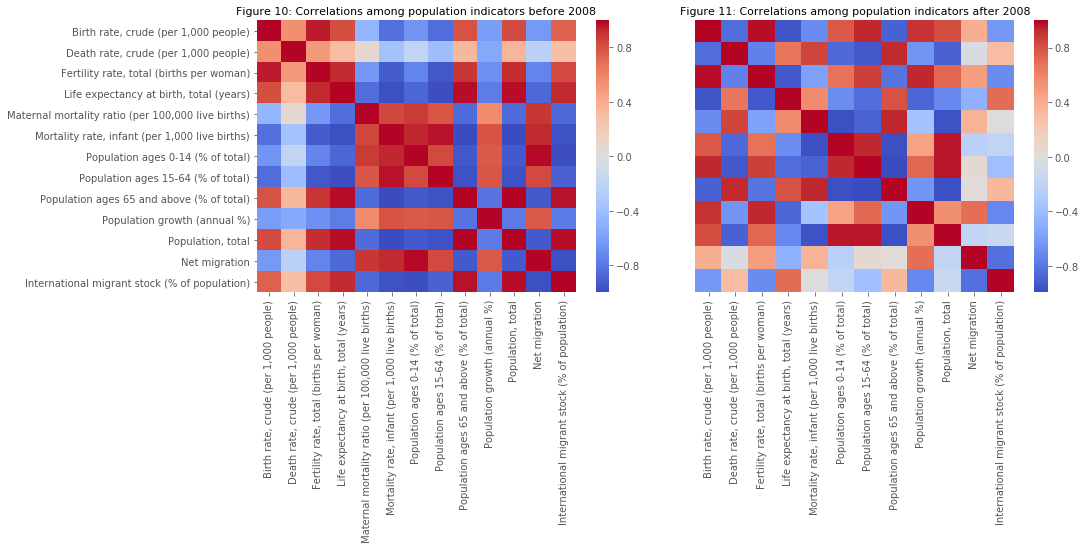

In [22]:
fig=plt.figure(figsize=(15, 5))

# Figure 10
plt.subplot(1, 2, 1)
sns.heatmap(popul_before.corr(), cmap='coolwarm')
plt.title('Figure 10: Correlations among population indicators before 2008', fontsize=11)

# Figure 11
plt.subplot(1, 2, 2)
sns.heatmap(popul_after.drop(columns='Maternal mortality ratio (per 100,000 live births)').corr(),\
            yticklabels=False, cmap='coolwarm')  # Remove the Maternal mortality ratio from the dataframe
plt.title('Figure 11: Correlations among population indicators after 2008', fontsize=11)

plt.subplots_adjust(wspace=0.1) 

<div class="alert alert-success"> 
<h3> Education level and Emigration</h3>

Education and R&D contribute largely to a country’s development, and should always go hand in hand to ensure a country’s progress. Firstly, investing in knowledge and secondly transforming this knowledge into a greater wellbeing for citizens on the strength of a better stock of products and services at lower cost, especially those related to health and the quality of life ([GMV, 2013](https://www.gmv.com/blog_gmv/language/en/education-and-rd-and-innovation-two-keys-to-development/)). Both of them imply talent and effort from, and investment in, all stakeholders: students, teachers, researchers etc.

Fortunately enough, the Greek government expenditures on Education and R&D have been increased after the beginning of the recession (Figure 13), reaching collectively the 5% of GDP on average. In fact, the annual increase in the Education and R&D expenditures are relatively higher than other pioneering EU Member States (Figure 14). Greece is well on track on achieving one of its national priorities, which is the combating of illiteracy rates, by vividly spending more on "Paedeia", the rearing and education of its members ([Wikipedia, 2018](https://en.wikipedia.org/wiki/Paideia)).

As a result, there is a gradual increase in the stock of populations with intermediate and advanced education, which, as a matter of fact, ended up unemployed in large percentages (Figure 5 and 12). If the trend of Net migration in the last decade is also considered (Figure 9a), it is concluded that educated are those who massively left the country for pursuing opportunities abroad, contributing both directly and indirectly to the birth deficit in Greece.

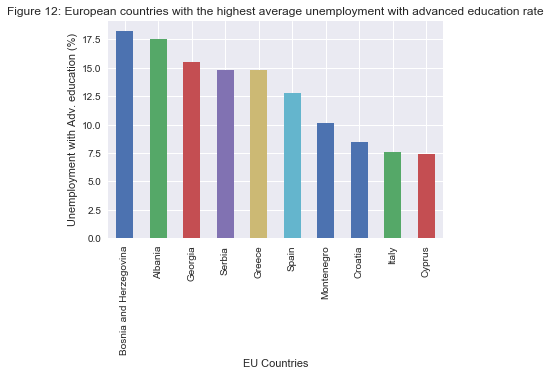

In [31]:
# Quick overview on the Unemployment rates for the educated in EU, to see where Greece stands on average for the
# 2008-2017 period.

indicator = {"SL.UEM.ADVN.ZS": "Unemployment with advanced education (% of total labor force)"}
unemployment = read_from_wbdata(indicator)

# selection of EU countries from the World Bank databases
european_countries = ['Albania', 'Austria', 'Azerbaijan', 'Belarus', 'Belgium', 'Bosnia and Herzegovina',\
                      'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic','Denmark', 'Estonia', 'Finland', 'France',\
                      'Georgia', 'Germany', 'Greece', 'Greenland', 'Hungary','Iceland', 'Ireland', 'Italy','Latvia',\
                      'Liechtenstein', 'Lithuania', 'Luxembourg', 'Macedonia,FYR', 'Moldova', 'Monaco', 'Montenegro',\
                      'Netherlands' ,'Norway', 'Poland', 'Portugal', 'Romania', 'Russian Federation', 'Serbia',\
                      'Slovak Republic', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Ukraine', 'United Kingdom']

x = unemployment.reset_index() # move the index of the date to the columns
x['date'] = x.date.dt.year # take the year from the series of the datetime objects
x[x.date>=2008]

y = x.groupby('country')['Unemployment with advanced education (% of total labor force)'].mean()

# only keep the european countries to compare

y = y[y.index.isin(european_countries)]
y.sort_values(ascending=False, inplace=True)
y[:10].plot.bar(title = "Figure 12: European countries with the highest average unemployment with advanced education rate")

plt.xlabel('EU Countries'); plt.ylabel('Unemployment with Adv. education (%)')
plt.show()

<div class="alert alert-success">

For those coutries that both Education and R&D expenditures are available from 2008 and on, the user can compare them with the expenditures of the Greek government on Education and R&D to any other country. The list of options will be shown in the dialogue window, and the total countries will be compared with the Greek case study.

In [24]:
# turn the indeces with the dates into a column
gov_exp_edu.reset_index(inplace=True)
gov_exp_rnd.reset_index(inplace=True)

# combine the expenditures on Education and R&D, and sum their values (% of GDP)
x = pd.merge(gov_exp_edu,gov_exp_rnd, on=["TIME","LOCATION"], how='outer')
x['total'] = x["Gov. Expend. on Education (% of GDP)"] + x["Gov. Expend. on R&D (% of GDP)"]

In [25]:
# function to plot Figures 12 and 13 based on user input and compared to Greece
def country_stat(country, df):
    
    # Plot the observations
    fig = plt.figure(figsize=(15,6), dpi=80)
    
    for i in range(len(country)):  # run more than once, if the user selects more countries for comparisons to Greece
        
        # Figure 13: show how the expenditures on Education and R&D evolve over time
        plt.subplot(1,2,1)
        MS = df[(df.LOCATION==country[i])&(df.TIME>=2008)]
        marker=":o"
        if country[i]=='GRC':    # new marker to distinguish the line of Greece
            marker = "-o"
        plt.plot(MS.TIME, MS.total, marker)
        plt.xlabel("TIME"); plt.ylabel("Gov. spendings on Education and R&D (% of GDP)")
        plt.title("Fig. 13: Gov. spendings on Education compared to Greece")
        
        # Figure 14: show the annual growths of the expenditures on Education and R&D
        plt.subplot(1, 2, 2)
        marker=":o"
        if country[i] == 'GRC':    # new marker to distinguish the line of Greece
            marker = "-o"
        plt.plot(np.arange(2008, 2017), annual_growth(MS), marker)        # call the function made for annual growth
        plt.xlabel("TIME");  plt.ylabel("Annual growth of spendings on Education and R&D (%)")
        plt.title("Fig. 14: Annual growth of Gov. spendings compared to Greece")
    
    plt.legend(country+['GRC'], loc=(1.1, 0))  
    plt.tight_layout()

In [26]:
# function to calculate annual growth
def annual_growth(df):
    df.reset_index(inplace=True)
    a = df['Gov. Expend. on Education (% of GDP)']          # final value
    b = df['Gov. Expend. on Education (% of GDP)'].shift(1) # first value
    ath = (a-b)*100/b                                       # growth rate
    return ath

GBR SWE ESP DNK KOR
AUT HUN EST FRA CZE
USA FIN NLD IRL POL
ISR JPN SVN NOR SVK
PRT ITA DEU BEL LVA

Please choose a country code for comparing to Greece: gbr

	Would you like to insert another country? (Y/N): y

Please choose a country code for comparing to Greece: esp

	Would you like to insert another country? (Y/N): y

Please choose a country code for comparing to Greece: ita

	Would you like to insert another country? (Y/N): n


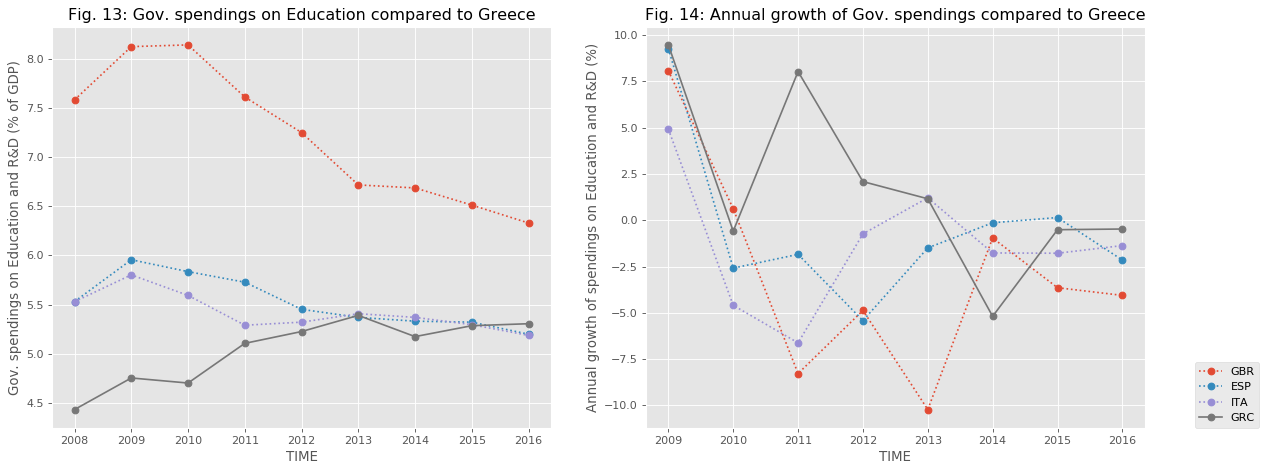

In [27]:
# list of member states of Europe 28.
World = ['GBR', 'SWE', 'ESP', 'DNK', 'KOR', 'AUT', 'HUN', 'EST', 'FRA', 'CZE', 'USA', 'FIN', 'NLD', 'IRL',\
         'POL', 'ISR', 'JPN', 'SVN', 'NOR', 'SVK', 'PRT', 'ITA', 'DEU', 'BEL', 'LVA']

input_country=[] 

for i in range(0, len(World), 5):
    print(World[i], World[i+1], World[i+2], World[i+3], World[i+4] )

# Loop that lasts as long as the user asks for more country codes
while True:
    word = str(input('\nPlease choose a country code for comparing to Greece: ')).upper() # ask and store user inputs
    if word not in World:                                                               # check correctness of input
        print('Country not found! Please choose a country from the list above!')
        continue             
    input_country.append(word)  # store the input into a list of user inputs
    
    # Loop that lasts as long as the user types correctly what to do
    while True:
        input_continue = str(input('\n\tWould you like to insert another country? (Y/N): ')).upper() # ask and store user input
        if(input_continue!='Y')&(input_continue!='N'):                                           # check correctness of input
            print('Your answer is not valid!')
            continue
        break            
    if input_continue=='N':
        break

# examine the case studies countries, as given from the user, plus Greece for comparisons.        
country_stat(input_country+['GRC'], x)


<div class="alert alert-success">
<h3> Government and Health</h3>

Among all indicators, the Total Government Expenditures show the most negative correlation with the Health spendings. At the same time, the variables related to Private Spendings (OOPs and Domestic Private Health Expend.) are weakly related to Gov. Expenditures on Health, meaning that they do not move the same way as others. The essential relation  between the governmnetal expenditures on Health and compulsory spendings on healthcare financing schemes has been alanyzed in Figure 6. The high presence of private health providers in total funding explains the high OOPs health expenditures. Besides, a research shows that the Mediterranean people may not be as disciplined as their European counterparts in accessing and using the public health sector ([Grima et al., 2018](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5974227/)).

In Figure 15, it can be seen that the Net national savings, which have plunged during the crisis (negative values at the left-hand side of the figure), are strongly related to the Unemployment rates. While the disposable income in Europe is approximately 11% per year ([Eurostat, 2018](https://ec.europa.eu/eurostat/statistics-explained/index.php/Households_-_statistics_on_disposable_income,_saving_and_investment)), greek taxpayers are paying off their obligations through their savings, given their declining income and increasing cost of life.

Normally, more domestic Government expenditure on Health is associated with less reliance on OOPs. ([McIntyre et al., 2017](https://pdfs.semanticscholar.org/d520/494b901474ec8163e1a6e142d3f8ccf0a04d.pdf)). In Figure 16 it is shown the opposite: governent spendings are dropping, and the same time, households are unable to finance their healthcare. This denotes a clear mismatch between contributions to health and free healthcare. To underline the impact of this situation, the Mortality rate of infants is presented as the radius of the observations. The National School of Public Health said stillbirths had increased 21.5% from 3.31 per 1,000 in 2008 to 4.01 per 1,000 in 2011, attributing the rise to the growing rate of unemployment among women and the inability to access healthcare ([Guardian, 2013](https://www.theguardian.com/world/2013/sep/18/greece-birthrate-austerity-measures-healthcare)).


 Fig. 15: "Comparison of Ajusted savings and Income"


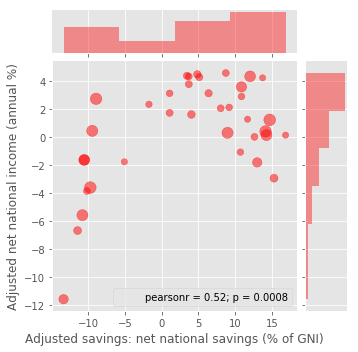


 Fig. 16: "Comparison of Governmental and OOP expenditure on Health"


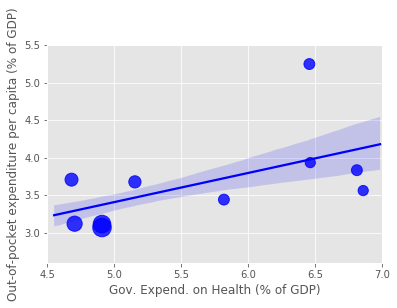

In [28]:
# Plot observations

# Figure 15
ax1 = sns.jointplot(kind='scatter', s=5*jobs_ind_GR['Unemployment, total (% of total labor force)'],data=econ_ind_GR, size=5, color='r',
              x='Adjusted savings: net national savings (% of GNI)', y='Adjusted net national income (annual %)', alpha=0.5)           
print('\n','Fig. 15: "Comparison of Ajusted savings and Income"')
plt.show()

# Figure 16
ax2 = sns.regplot(x='Gov. Expend. on Health (% of GDP)', y='Out-of-pocket expenditure per capita (% of GDP)', data=gov_ind_GR,
                  color='b', ci=60, scatter_kws={'s':popul_ind_GR['Mortality rate, infant (per 1,000 live births)']**4})

plt.xlim(4.5, 7.001); plt.ylim(2.6, 5.5)
print('\n','Fig. 16: "Comparison of Governmental and OOP expenditure on Health"')  

plt.show()  # The titles were printed for avoiding an overlap with the visualization of distributions.

<div class="alert alert-success">
Finally, a dendrogram was constructed for the period 2008-2017, in which the aggregated matrix dataset "EJGP_after" is plotted as a hierarchically-clustered heatmap. It allows to visualise the structure of the indicators (dendrogram), and to verify the logical structure of the system we analyzed (heatmap) ([Waskom, 2018](https://seaborn.pydata.org/generated/seaborn.clustermap.html)). A root node produces several other nodes which lead to leaf nodes (the bottom of the tree). Each column is a variable that describes the system, and the indicators which are highly similar are close in the tree. Therefore the dendogram will be used for clustering the indicators, and assist for extracting conclusions and recommendations.

Notably a strong correlation between government revenues from taxes, and clustering with Health related issues are revealed. Expenditures are decreased due to unemployment in all categories, while the social contributions are indeed related and positively correlated to a large Labor Force. The positive correlation between the final consumption expenditure and employment in Industry can back up the fact that the more net income and adjusted savings lead to less inflation (or more annual CPI %), which all follow an opposite trend from the Unemployment rates for all categories. The contradictory statistic of highly educated populations and their high unemployment rates is strongly corralated with the low employment in industry, tending to follow a downward trend.

Fig. 17: dendrogram with heatmap for all indicators after the 2008 crisis


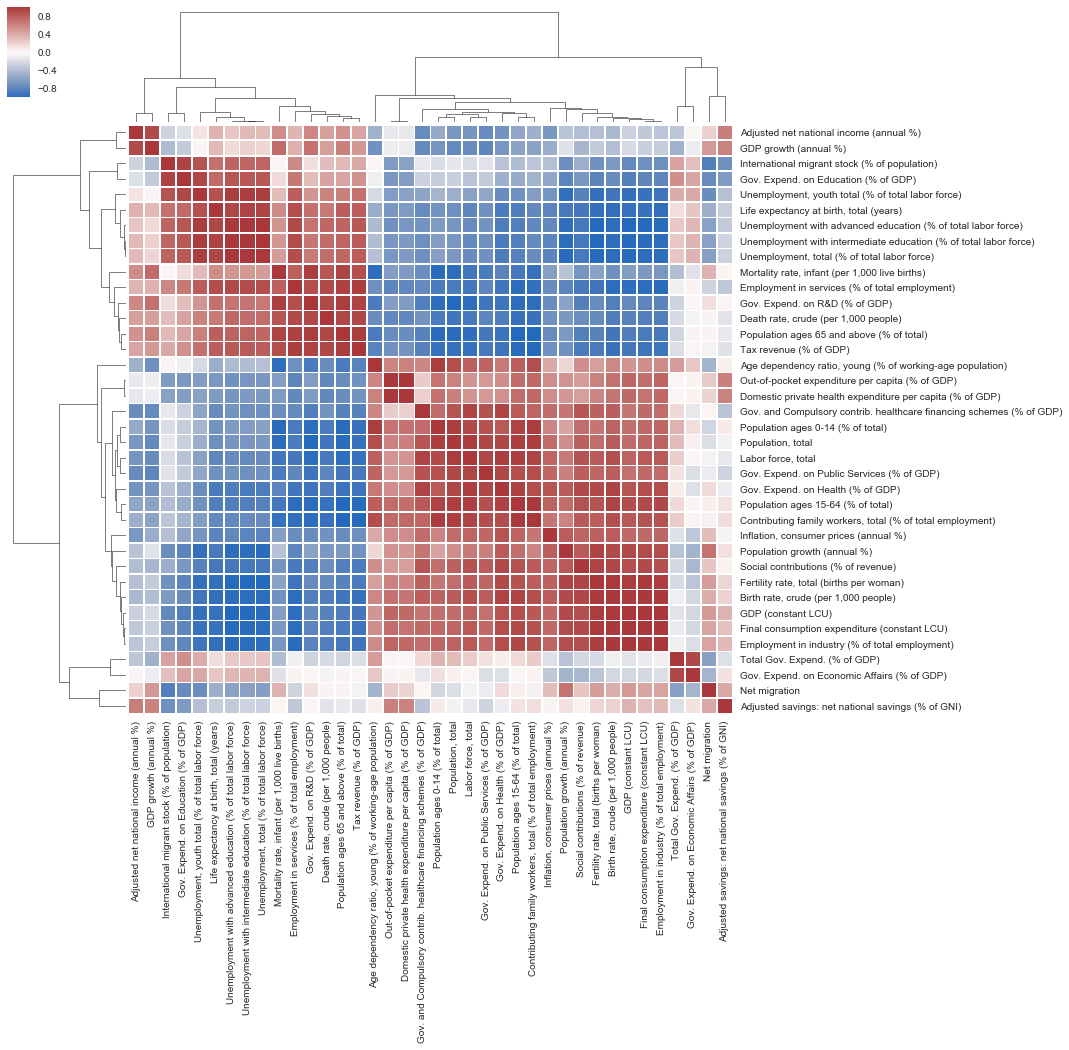

In [29]:
# Plot the Dendrogram with heatmap

sns.set()
sns.clustermap(EJGP_after.corr(), center=0, cmap="vlag", linewidths=.75, figsize=(13, 13)) 
print('Fig. 17: dendrogram with heatmap for all indicators after the 2008 crisis')
plt.show()

<div class="alert alert-success">
<h1>Conclusion</h1>

Within this project, the team identified the factors with a direct effect on the population trend in Greece by 2030, as a consequence of the weakening in Employment and Health sectors and the respective Government spendings. By focusing mainly on the time period around the economic recession of 2008, it is concluded that the growing numbers of unemployed citizens, especially among the young, and the falling birth and fertilty rates, forced Greece to deviate from its sustainable goals for development.

Socio-economic and cultural determinants, such as employment prospects and educational level, shaped an attitude for a modern emigration a consequence of harsh austerity. On the wider social context, factors such as labour-market trends, health, and tax incentives, they all have their influences ([Sarikaki, 2001](https://www.demogr.mpg.de/Papers/workshops/010623_paper24.pdf)). The population stocks started to reduce, creating inbalances between pupils and the elderly. On top of that, families became gradually incapable of affording the increasing expenses of their members or newborns, as reflected by their curtailed annual income, the decreased consumption of products and the negative rate of savings (Figure 15).

The problem of birth deficit is magnified, since the government expenditures on health and public services are primarily supported by social contributions. The imposition of taxes may counterbalance the lost revenues, but impedes the economic development in the long-term. Health expenditures per capita have dropped by half during the last decade, prohibiting the access to healthcare and having a direct effect on the infant and maternal mortality. Greece will more likely continue to face the challenge of reshaping the general demographic map in the following years, taking up the resposnibility to combat the causes and effects of low fertility trends. 

A more efficient way for projecting the population trend for the coming years would be the application of a machine learning regression algorithm. More spefically, the feature space would initially be consisted of the aforementioned indicators of Figure 17. After applying a Principal Component Analysis for reducing further the feature space and decorrelate the variables, a linear regression unit or even a multilayer perceptron could be applied. A very efficient and popular machine learning library for Python is provided through [sklearn](http://scikit-learn.org/stable/).

<div class="alert alert-success">
<h1>Recommendations</h1>

It was verified that the Greek population will decrease by approximately 10% the following decades (Figure 8). The phenomenon may seem irreversible, but the key interrelations identified among the indicators can lead the way to necessary policy signals. 

The prevailing indicator trends (Figures 9a and 9b) are more likely to sustain their direction, as long as the measures applied have a more reactive than proactive orientation. For instance, an increase of government Health spendings targeting the individual contributions would revitalize the Health system, but access to healthcare would not be durable in the long-term. As shown in the clustermap of Figure 17, Health expenditures are interwonen to, and positively correlated with, the labor force and young population stocks, denoting the need for an anthropocentric focus. In the mid-term, younger workers will be capable of funding retirement programs or other state welfare agendas via taxes, setting the basis for social inclusion and well-balanced social classes. 

Births are following the trend of fertility rates, which shifts the attention to the capabilities and living conditions of the families. Child benefits and family allowances would ease the situation, offering a kickstart to households for bringing up the newborns. Child care provisions or tax deductions for unemployed parents would alleviate the households in a tough period of prolonged recession, which can be covered by the European funds offered to vulnerable groups, for attaining the SDG of combating the birth deficit. 

Finally, Education and R&D received a great support during the last decade, and still, the educated human resource is both discredited and underutilized. It is paramount for Greece to guarantee a future for the large numbers of educated populations, where the vast majority of its citizens have been reared with the belief that they can make a great impact in their homeland. Incentives must be given for working in Industry than Services, which are currently following opposite trends and influence the magnitude of the labor force. Tax reductions for small and medium-sized businesses would instantly create more vacancies in challenging positions, allowing people to evolve in both a professional and personal manner. Greece can be back on track on achieving sustainable development, creating a fertile ground for the advancement of the future generations.